In [32]:

import kagglehub

In [33]:
path = kagglehub.dataset_download("amitabhajoy/bengaluru-house-price-data")

In [34]:
path

'C:\\Users\\shubh\\.cache\\kagglehub\\datasets\\amitabhajoy\\bengaluru-house-price-data\\versions\\2'

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
# matplotlib.rcParans["figure,figsize"] = (20,10)

## 📌 Problem Statement
This project aims to predict house prices in Bangalore using various features such as area type, location, size, etc.

In [55]:
df = pd.read_csv(r"C:\Users\shubh\Downloads\Bengaluru_House_Data.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


## 📊 Dataset Overview
We begin by loading and inspecting the dataset to understand its structure and types of features available.

In [56]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [58]:
df.shape

(13320, 9)

df['area_type'] vs df.groupby('area_type')


---


1**.df['area_type']**
This accesses a single column — a Series — from the DataFrame: Useful for operations like .value_counts(), .unique(), .isnull()  


---


2.**df.groupby('area_type')** This creates a group-by object, meaning you are grouping the DataFrame based on unique values in area_type.have to aggregate it using .sum(), .mean(), .count(), etc.

## 🧹 Data Preprocessing
This section covers cleaning of data: handling missing values, outliers, and converting textual data into usable formats.

In [59]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [60]:
# Drop these features (too many missing or irrelevant)
df = df.drop(['area_type','society','balcony','availability'], axis='columns')

In [61]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [62]:
feature_with_null = [feature for feature in df.columns if df[feature].isnull().sum()]
feature_with_null
for feature in feature_with_null:
  print(feature , np.round((df[feature].isnull().mean())* 100 , 4 ) ,'% missing value' )


location 0.0075 % missing value
size 0.1201 % missing value
bath 0.548 % missing value


In [63]:
df1 = df.dropna()
df1
##This one does NOT count missing values. It simply counts the total number of rows per column
## Sum counts values that are not null
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [64]:
df1.shape

(13246, 5)

In [65]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [66]:
df1['bhk'] = df1['size'].apply(lambda x : int(x.split(' ')[0] ))
df1

C:\Users\shubh\AppData\Local\Temp\ipykernel_30236\4218204468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bhk'] = df1['size'].apply(lambda x : int(x.split(' ')[0] ))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [67]:
df1['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [68]:
df1[df1.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [69]:
df1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

## 📈 Exploratory Data Analysis (EDA)
Let's explore how different features affect the house price. We'll include value counts, distributions, and group-wise aggregations.

In [70]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [71]:
df1[~df1['total_sqft'].apply(is_float)].head(20)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [72]:
def convert_range_to_num(x):
    try:
        x = str(x)
        tokens = x.split('-')
        if len(tokens) == 2:
            return (float(tokens[0]) + float(tokens[1])) / 2
        return float(x)
    except:
        return None


In [73]:
convert_range_to_num('2166-3166')
convert_range_to_num('216666')


216666.0

In [74]:
convert_range_to_num('34.46sq.Meter')

In [75]:
df2 = df1.copy()

In [76]:
##
df2[df2['total_sqft'].apply(convert_range_to_num).notnull()]
##This filters rows in df2 based on whether the convert_range_to_num function returns a truthy value (non-zero, non-None, non-NaN) for total_sqft.
##It doesn’t change the data, just gives a subset of rows.

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [77]:
df2['total_sqft'] = df2['total_sqft'].apply(convert_range_to_num)
df2.head(20)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [78]:
# Conforming the transformation
df2.iloc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

# **Feature Engineering**




## 🏗️ Feature Engineering
We refine the data and create new features such as price per square foot and handle one-hot encoding for categorical variables.

In [79]:
df3 = df2.copy()

In [80]:
df3['price_per_sqft'] = df3['price'] * 100000/ df3['total_sqft']
df3

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [81]:
len(df3.location.unique())

1304

In [82]:
## 1304 locations , one hot enoding with create 1304 cols , which is huge number and this is dimmentionality curse

In [83]:
df3.location = df3.location.apply(lambda x : x.strip())
location_stats = df3.groupby('location')['location'].value_counts().sort_values(ascending=False)
location_stats


location
Whitefield                            535
Sarjapur  Road                        392
Electronic City                       304
Kanakpura Road                        266
Thanisandra                           236
                                     ... 
poornaprajna layout                     1
pavitra paradise                        1
near Ramanashree California resort      1
mvj engineering college                 1
1Kasavanhalli                           1
Name: count, Length: 1293, dtype: int64

In [84]:
location_stats_less_than_10 = (location_stats[location_stats<=10])
location_stats_less_than_10

location
Kalkere                               10
Sadashiva Nagar                       10
BTM 1st Stage                         10
Basapura                              10
Gunjur Palya                          10
                                      ..
poornaprajna layout                    1
pavitra paradise                       1
near Ramanashree California resort     1
mvj engineering college                1
1Kasavanhalli                          1
Name: count, Length: 1052, dtype: int64

In [85]:
len(location_stats[location_stats<=10])

1052

In [86]:
df3['location'].nunique()

1293

In [87]:
df3.location = df3.location.apply(lambda x : 'other'  if x in location_stats_less_than_10 else x )
df3

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [88]:
df3['location'].nunique()

242

In [89]:
df3[(df3['bhk'] != 0) & (df3['total_sqft']/df3['bhk'] < 300)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [90]:
df3.shape

(13246, 7)

In [91]:
df4 = df3[~((df3['bhk'] != 0) & (df3['total_sqft']/df3['bhk'] < 300))]
df4.shape

(12502, 7)

In [92]:
df4.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [93]:
def remove_pps_outlier(df):
  cleaned_df = pd.DataFrame()
  for location , group in df.groupby('location'):
    mean = group['price_per_sqft'].mean()
    std = group['price_per_sqft'].std()
    filtered = group[(group['price_per_sqft'] >(mean-std)) & (group['price_per_sqft'] <= (mean + std))]
    cleaned_df = pd.concat([cleaned_df , filtered] , ignore_index=True )
  return cleaned_df





In [94]:
df5 = remove_pps_outlier(df4)


In [95]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [96]:
df5.shape

(10291, 7)

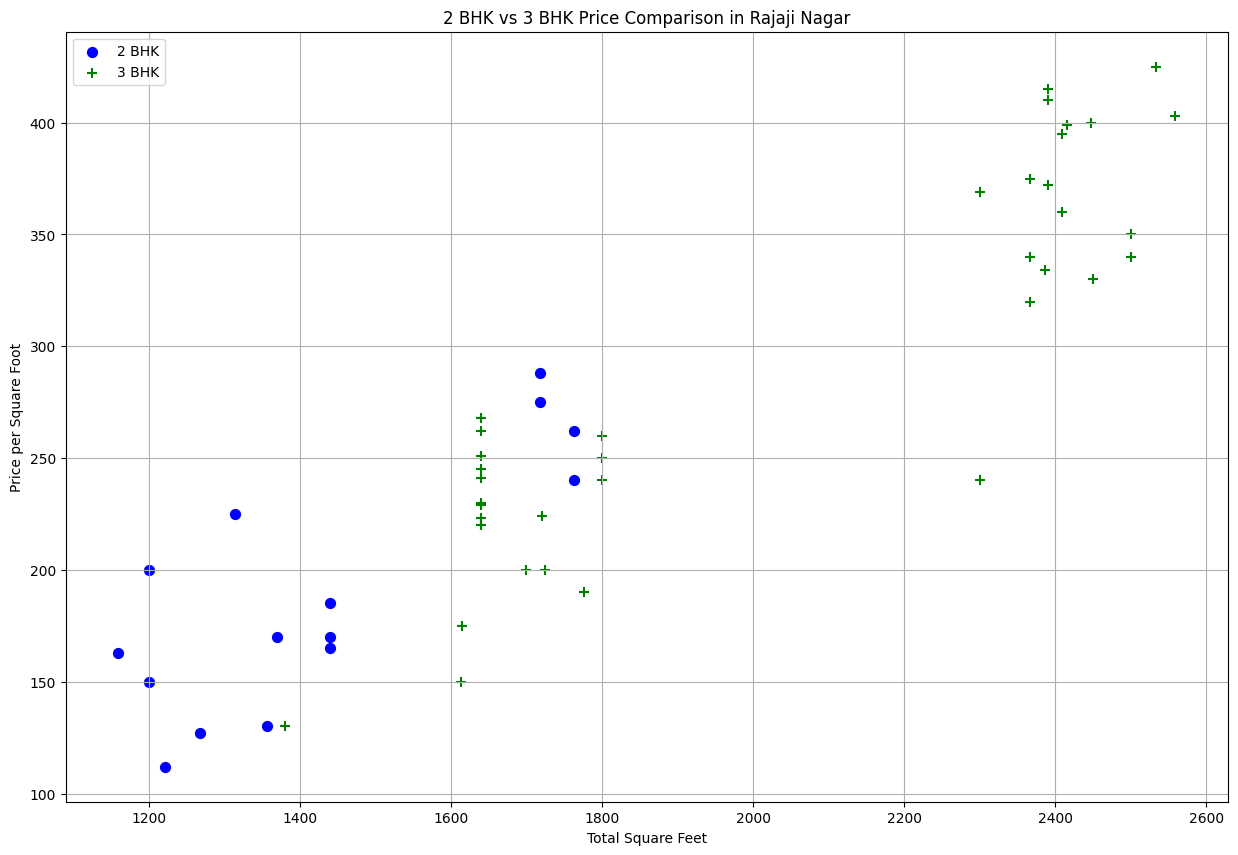

In [97]:
import matplotlib.pyplot as plt
import matplotlib

def plot_scatter(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]

    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price,marker='+' ,color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet")
    plt.ylabel("Price per Square Foot")
    plt.title(f"2 BHK vs 3 BHK Price Comparison in {location}")
    plt.legend()
    plt.grid(True)
    plt.show()


plot_scatter(df5, 'Rajaji Nagar')

In [98]:
def remove_bhk_outliers(df):
    indices_to_remove = []  # Store indexes of outliers

    # Group data by each location
    for location, location_df in df.groupby('location'):
        # Create a dictionary to store price stats for each BHK level
        bhk_price_stats = {}

        # Loop through each BHK group in that location
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_price_stats[bhk] = {
                'mean_price': bhk_df['price_per_sqft'].mean(),
                'std_dev': bhk_df['price_per_sqft'].std(),
                'count': bhk_df.shape[0]
            }

        # Now check if a higher BHK is priced less than the lower BHK's average
        for bhk, bhk_df in location_df.groupby('bhk'):
            lower_bhk_stats = bhk_price_stats.get(bhk - 1)
            if lower_bhk_stats and lower_bhk_stats['count'] > 5:
                # If this BHK is priced less than the previous BHK's average → outlier
                bad_bhk = bhk_df[bhk_df['price_per_sqft'] < lower_bhk_stats['mean_price']]
                indices_to_remove.extend(bad_bhk.index)

    # Drop all detected outliers
    return df.drop(indices_to_remove, axis='index')

## 🤖 Model Building
Using linear regression and other algorithms to train a predictive model on cleaned data.

In [99]:
df6 = remove_bhk_outliers(df5)

In [100]:
print("✅ After removing BHK outliers:", df6.shape)

✅ After removing BHK outliers: (7376, 7)


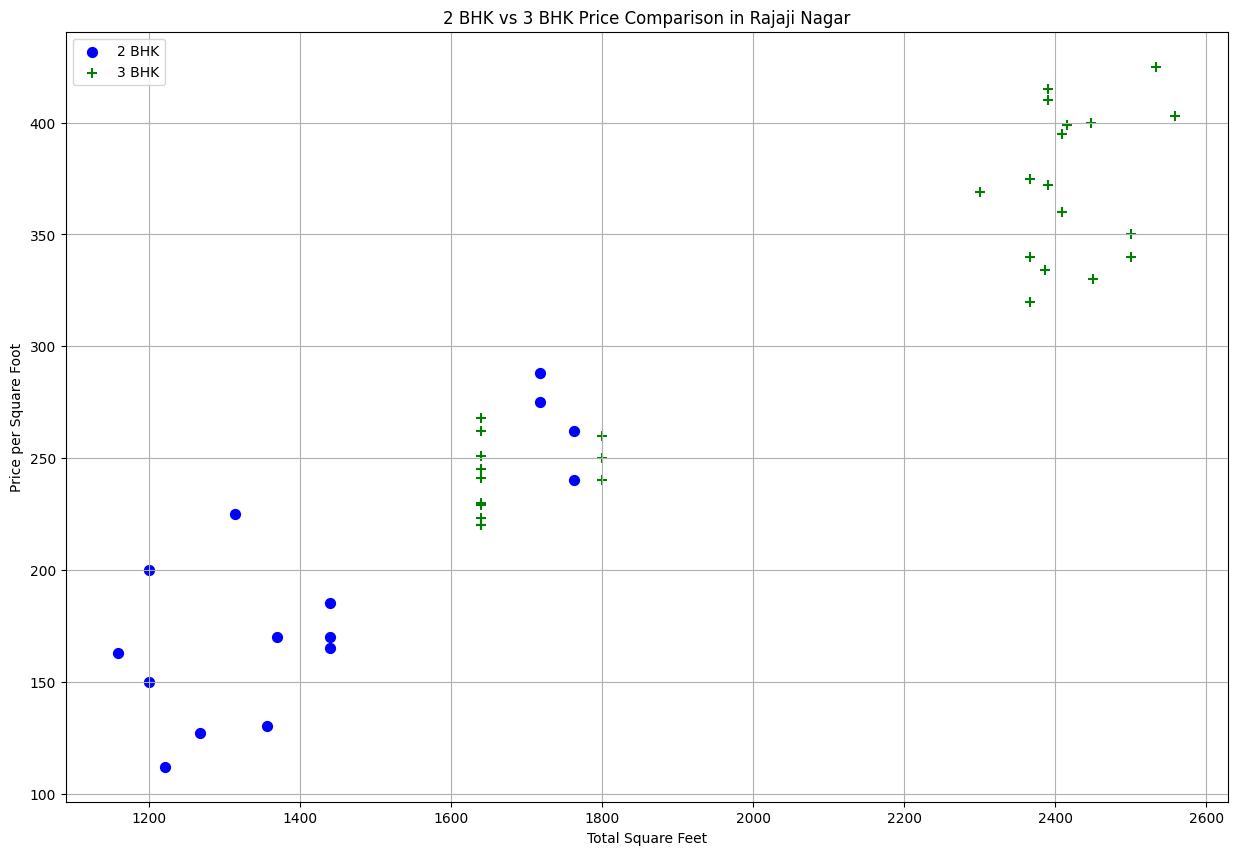

In [101]:
plot_scatter(df6, 'Rajaji Nagar')

Text(0, 0.5, 'Count')

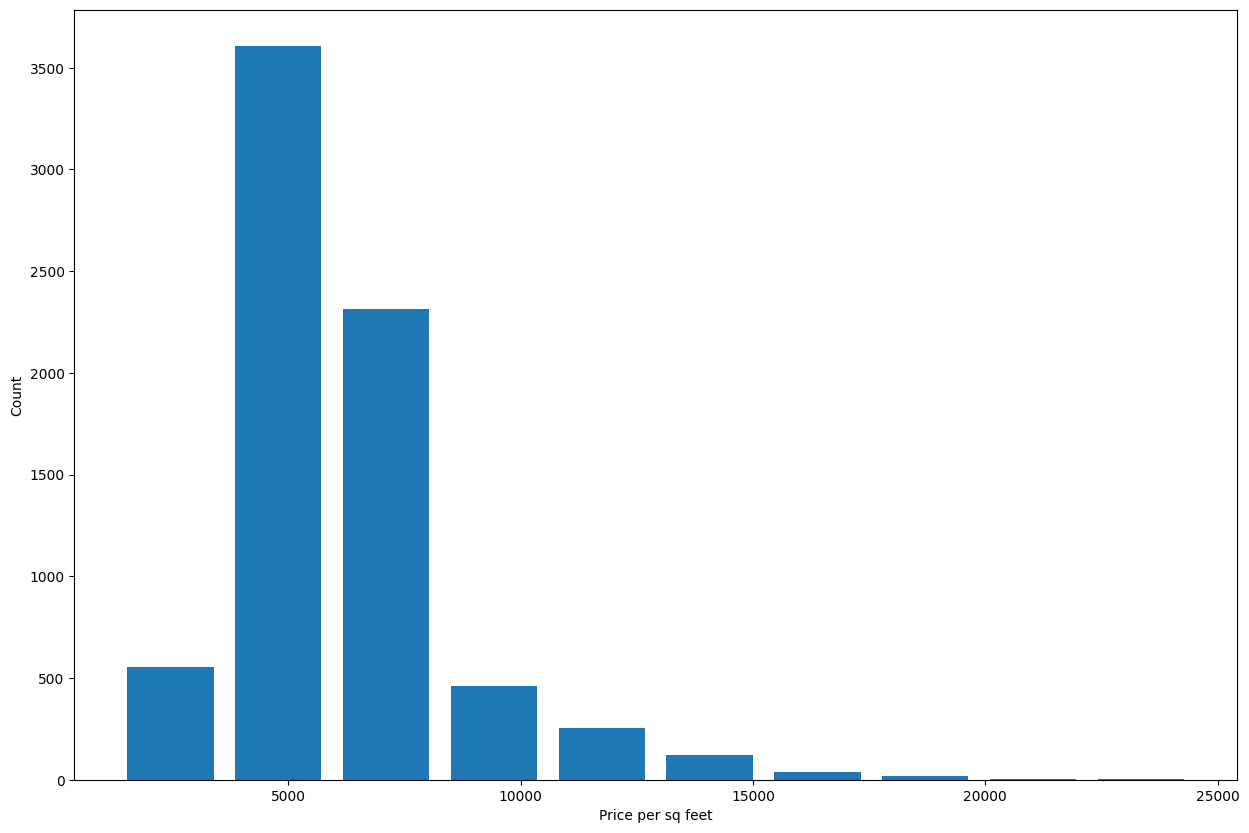

In [102]:
plt.hist(df6.price_per_sqft , rwidth = 0.8  , )
plt.xlabel("Price per sq feet")
plt.ylabel("Count")

In [103]:
df6.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [104]:
df[df['bath'] > 10]

,location,size,total_sqft,bath,price
938,5th Phase JP Nagar,9 Bedroom,1260,11.0,290.0
1078,BTM 1st Stage,9 Bedroom,3300,14.0,500.0
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0
1768,1 Ramamurthy Nagar,11 Bedroom,1200,11.0,170.0
1953,KR Puram,8 Bedroom,1200,12.0,110.0
1979,Hongasandra,8 Bedroom,990,12.0,120.0
3096,Jp nagar 8th Phase .,10 BHK,12000,12.0,525.0
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0
4684,Munnekollal,43 Bedroom,2400,40.0,660.0


Text(0, 0.5, 'Count')

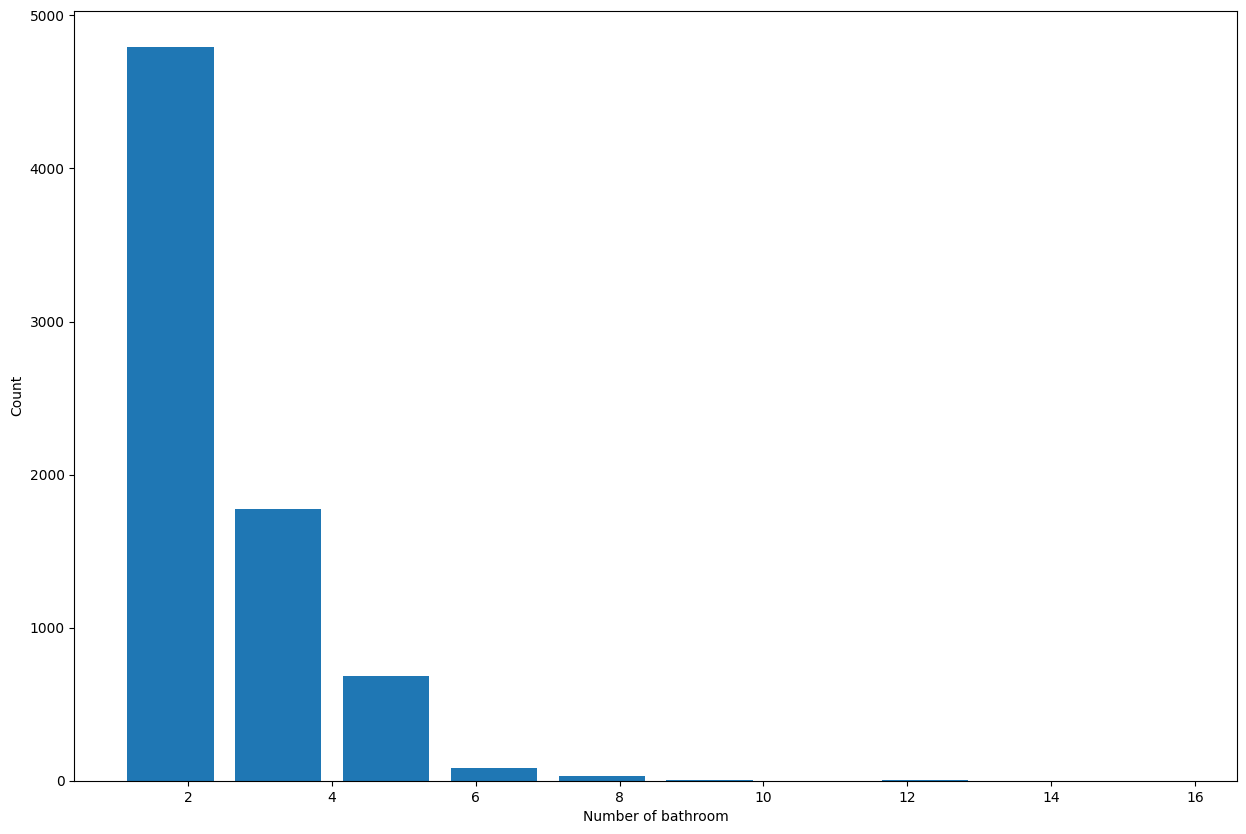

In [105]:
plt.hist(df6.bath , rwidth= 0.8)
plt.xlabel("Number of bathroom")
plt.ylabel("Count")

In [106]:
df7 = df6[df6['bath'] < (df6['bhk'] + 2 )]
df7

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10282,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10283,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10286,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10287,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [107]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  1.,  6.,  8.,  7.,  9., 16., 12., 13.])

In [108]:
df7.shape

(7297, 7)

In [109]:
df8 = df7.drop(['size', 'price_per_sqft'] , axis=1)

In [110]:
df8

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10282,other,1200.0,2.0,70.0,2
10283,other,1800.0,1.0,200.0,1
10286,other,1353.0,2.0,110.0,2
10287,other,812.0,1.0,26.0,1


In [111]:
# one hot encoding
dummies = pd.get_dummies(df8.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10282,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10283,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10286,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10287,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [112]:
df9 = pd.concat([df8 ,  dummies.drop('other' , axis='columns')] , axis = 1)
df9

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10282,other,1200.0,2.0,70.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10283,other,1800.0,1.0,200.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10286,other,1353.0,2.0,110.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10287,other,812.0,1.0,26.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [113]:
print("Final shape after encoding:", df9.shape)

Final shape after encoding: (7297, 246)


In [114]:
df10 = df9.drop('location' , axis = 1)
df10

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10282,1200.0,2.0,70.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10283,1800.0,1.0,200.0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10286,1353.0,2.0,110.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10287,812.0,1.0,26.0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [115]:
x = df10.drop('price' , axis= 'columns')
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [116]:
y = df10.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [117]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(x, y , test_size = 0.2 , random_state=10)

In [118]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train ,  Y_train)
regression.score(X_test , Y_test)

0.7938089591502325

## ✅ Model Evaluation
Assessing performance with metrics such as R² and visualization of predicted vs actual prices.

In [119]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=.2, random_state=0)
cross_val_score(LinearRegression() , x,y , cv = cv )

array([0.79156627, 0.80518683, 0.8623199 , 0.83998208, 0.8676077 ])

In [120]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {}  # 'normalize' removed for modern sklearn
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])



In [125]:
find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.833333,{}
1,lasso,0.678330,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.744882,"{'criterion': 'squared_error', 'splitter': 'be..."


In [128]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [123]:
import numpy as np

def predict_price(location , sqft , bath , bhk):
  # find loc_index
  loc_index = np.where(x.columns == location)[0][0]
  # a = [0,0,0,0,]
  a = np.zeros(len(x.columns))
  a[0] = sqft
  a[1] = bath
  a[2] = bhk
  if loc_index >= 0 :
    a[loc_index] = 1
  return regression.predict([x])


In [130]:
import numpy as np

def predict_price(location, sqft, bath, bhk):
    # Find index of location column in X.columns
    try:
        i =  np.where(x.columns == location)
        print(i)
        loc_index = np.where(x.columns == location)[0][0]

    except IndexError:
        raise ValueError(f"Location '{location}' not found in feature columns.")

    # Initialize feature vector with zeros
    a = np.zeros(len(x.columns))

    # Set numeric features
    a[0] = sqft
    a[1] = bath
    a[2] = bhk

    # Set location one-hot encoded feature
    if loc_index >= 0:
        a[loc_index] = 1

    # Predict price using your regression model
    prediction = regression.predict([a])[0]
    return f"{prediction:.4f}"


In [131]:
predict_price('1st Phase JP Nagar', 1000, 3, 3)

(array([4]),)


C:\Users\shubh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


'89.5259'

In [132]:
predict_price('Indira Nagar', 1000, 2, 2)

(array([116]),)


C:\Users\shubh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


'179.9951'

In [133]:
import pickle
from google.colab import drive
drive.mount('/content/drive' , force_remount=True)
with open('/content/drive/MyDrive/Banglore_House_prediction.pickle', 'wb') as f:
    pickle.dump(regression, f)


ModuleNotFoundError: No module named 'google'

In [ ]:
import json
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define directory and file path
folder_path = '/content/drive/MyDrive/ML_Projects'
os.makedirs(folder_path, exist_ok=True)  # ✅ create folder if it doesn't exist

save_path = os.path.join(folder_path, 'columns.json')

# Prepare columns dictionary
columns = {
    'data_columns': [col.lower() for col in x.columns]  # assuming x is your DataFrame
}

# Write to JSON file
with open(save_path, 'w') as f:
    json.dump(columns, f)

print(f"✅ columns.json saved to: {save_path}")



## 📌 Conclusion
Summarizing key findings and model performance.

## 🔮 Prediction Demo
Showcasing prediction capability by taking inputs and returning predicted price.